# Inference of contact

In [1]:
import seaborn as sns
import utility as uti
import numpy as np
import matplotlib.pyplot as plt

cmaps = np.array([(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202), (0, 0, 0)])/255 # http://tsitsul.in/blog/coloropt/
l = [1, 0, 5, 2, 4, 3, 6, 7]
cmaps = cmaps[l]
sns.set_theme(context='notebook', style='ticks', palette=cmaps, color_codes=True, rc=None)

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "arial",
    # Use 10pt font in plots, to maT_ch 10pt font in document
    "font.size": 9.8,
    "axes.titlesize" : 8.5,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "axes.labelsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth" : 1.3,
    'axes.linewidth' : 1,
}
fontsize_ylabel = 7.2

plt.rcParams.update(tex_fonts)

regularisation = 0.5
theta = 0
width = "article"

label_r = "Natural data"
label_1 = "Phylo rand."
label_3 = "Phylogeny only"
label_4 = " Null model"
ylabel = "Correct fraction"      
label_0 = "$\\bf{Contacts}$ $\\bf{only}$\n" + ylabel
label_2 = "$\\bf{Contacts}$ $\\bf{&}$ $\\bf{phylo.}$\n"+ ylabel
color_natural_data = cmaps[5]

name_8 = "prot_HK_and_RR_Threshold_8_CarbonAlpha"

/home/andonis/.local/lib/python3.8/site-packages/seaborn/palettes.py:1021: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette == "reset":


In [2]:
def plot_contact(name_graph, arDCA = True, bmDCA = False):
    if "HK" in name_graph:
        l1 = "$\\bf{Inter}$-$\\bf{protein}$ $\\bf{contacts}$"
        l2 = "$\\bf{Intra}$-$\\bf{HK}$ $\\bf{contacts}$"
        l3 = "$\\bf{Intra}$-$\\bf{RR}$ $\\bf{contacts}$"
    if "MalG" in name_graph:
        l1 = "$\\bf{Inter}$-$\\bf{protein}$ $\\bf{contacts}$"
        l2 = "$\\bf{Intra}$-$\\bf{MalG}$ $\\bf{contacts}$"
        l3 = "$\\bf{Intra}$-$\\bf{MalK}$ $\\bf{contacts}$"

    L_inter = np.load("Code_for_cluster/output_inference_contact/L_inter_%s.npy"%name_graph)
    L_intra_hk  = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_%s.npy"%name_graph)
    L_intra_rr = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_%s.npy"%name_graph)
    
    if bmDCA:
        L_inter_no_phylo_bmDCA = np.load("Code_for_cluster/output_inference_contact/L_inter_no_phylo_bmDCA_%s.npy"%name_graph)
        L_inter_phylo_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_bmDCA_tree_%s.npy"%name_graph)
        L_inter_phylo_equi_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_equi_bmDCA_tree_%s.npy"%name_graph)

        L_intra_hk_no_phylo_bmDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_no_phylo_bmDCA_%s.npy"%name_graph)
        L_intra_hk_phylo_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_bmDCA_tree_%s.npy"%name_graph)
        L_intra_hk_phylo_equi_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_equi_bmDCA_tree_%s.npy"%name_graph)

        L_intra_rr_no_phylo_bmDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_no_phylo_bmDCA_%s.npy"%name_graph)
        L_intra_rr_phylo_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_bmDCA_tree_%s.npy"%name_graph)
        L_intra_rr_phylo_equi_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_equi_bmDCA_tree_%s.npy"%name_graph)
    
    if arDCA:
        L_inter_no_phylo_arDCA = np.load("Code_for_cluster/output_inference_contact/L_inter_no_phylo_arDCA_%s.npy"%name_graph)
        L_inter_phylo_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_arDCA_tree_%s.npy"%name_graph)
        L_inter_phylo_equi_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_equi_arDCA_tree_%s.npy"%name_graph)

        L_intra_hk_no_phylo_arDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_no_phylo_arDCA_%s.npy"%name_graph)
        L_intra_hk_phylo_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_arDCA_tree_%s.npy"%name_graph)
        L_intra_hk_phylo_equi_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_equi_arDCA_tree_%s.npy"%name_graph)

        L_intra_rr_no_phylo_arDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_no_phylo_arDCA_%s.npy"%name_graph)
        L_intra_rr_phylo_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_arDCA_tree_%s.npy"%name_graph)
        L_intra_rr_phylo_equi_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_equi_arDCA_tree_%s.npy"%name_graph)

    l_predic = [i for i in range(1,101)]
    figsize = uti.set_size(width,subplots=(2,3))
    plt.figure(figsize=figsize)

    label_bm = "bmDCA"
    label_ard = "arDCA"
    #### No phylo ######
    plt.subplot(2,3,1)
    plt.plot(l_predic, L_inter[:100], label=label_r, color=color_natural_data)
    if bmDCA:
        plt.plot(l_predic, L_inter_no_phylo_bmDCA[:100],label=label_bm)
    if arDCA:
        plt.plot(l_predic, L_inter_no_phylo_arDCA[:100],label=label_ard, color=cmaps[1])
    plt.margins(x=0)
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.set_ylim(-0.05,1.05)
    plt.ylabel(label_0, fontsize=fontsize_ylabel)
    plt.title(l1)


    plt.subplot(2,3,2)
    plt.plot(l_predic, L_intra_hk[:100],label=label_r, color=color_natural_data)
    if bmDCA:
        plt.plot(l_predic, L_intra_hk_no_phylo_bmDCA[:100],label=label_bm)
    if arDCA:
        plt.plot(l_predic, L_intra_hk_no_phylo_arDCA[:100],label="arDCA", color=cmaps[1])
    plt.margins(x=0)
    plt.title(l2)
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.set_ylim(-0.05,1.05)

    plt.subplot(2,3,3)
    plt.plot(l_predic, L_intra_rr[:100],label=label_r, color=color_natural_data)
    if bmDCA:
        plt.plot(l_predic, L_intra_rr_no_phylo_bmDCA[:100],label=label_bm)
    if arDCA:
        plt.plot(l_predic, L_intra_rr_no_phylo_arDCA[:100],label="arDCA", color=cmaps[1])
    plt.margins(x=0)
    plt.title(l3)
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.set_ylim(-0.05,1.05)
    
    #### Phylo start equi ##################
    plt.subplot(2,3,4)
    plt.plot(l_predic, L_inter[:100],label=label_r, color=color_natural_data)
    if bmDCA:
        plt.plot(l_predic, L_inter_phylo_equi_bmDCA_tree[:100], label=label_bm)
    if arDCA:
        plt.plot(l_predic, L_inter_phylo_equi_arDCA_tree[:100], label=label_ard, color=cmaps[1])
    plt.margins(x=0)
    plt.ylabel(label_2, fontsize=fontsize_ylabel)
    plt.xlabel("Number of predicted contacts")
    ax = plt.gca()
    ax.set_ylim(-0.05,1.05)

    plt.subplot(2,3,5)
    plt.plot(l_predic, L_intra_hk[:100],label=label_r, color=color_natural_data)
    if bmDCA:
        plt.plot(l_predic, L_intra_hk_phylo_equi_bmDCA_tree[:100], label=label_bm)
    if arDCA:
        plt.plot(l_predic, L_intra_hk_phylo_equi_arDCA_tree[:100], label=label_ard, color=cmaps[1])
    plt.margins(x=0)
    ax = plt.gca()
    ax.axes.yaxis.set_ticklabels([])
    ax.set_ylim(-0.05,1.05)
    plt.xlabel("Number of predicted contacts")

    plt.subplot(2,3,6)
    plt.plot(l_predic, L_intra_rr[:100],label=label_r, color=color_natural_data)
    if bmDCA:
        plt.plot(l_predic, L_intra_rr_phylo_equi_bmDCA_tree[:100], label=label_bm)
    if arDCA:
        plt.plot(l_predic, L_intra_rr_phylo_equi_arDCA_tree[:100], label=label_ard, color=cmaps[1])
    plt.margins(x=0)
    ax = plt.gca()
    ax.axes.yaxis.set_ticklabels([])
    ax.set_ylim(-0.05,1.05)
    plt.tight_layout(pad=0.4)
    plt.xlabel("Number of predicted contacts")
    plt.legend(ncol=3, bbox_to_anchor=(0.35, 3), loc="best")
    name = "figures/S12_Inference_contact_21_%s.eps"%name_graph

    plt.savefig(name, bbox_inches = "tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


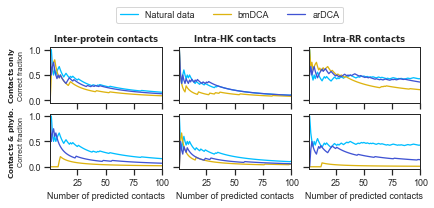

In [3]:
name_graph = "prot_HK_and_RR_Threshold_8_CarbonAlpha" #"prot_HK_and_RR_Threshold_4_MinAllDist"
plot_contact(name_graph, arDCA=True, bmDCA=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


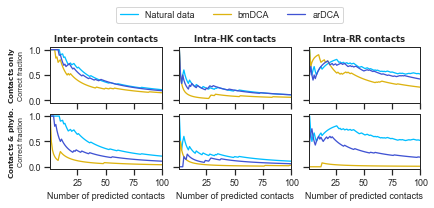

In [4]:
name_graph = "prot_HK_and_RR_Threshold_4_MinAllDist" #"prot_HK_and_RR_Threshold_4_MinAllDist"
plot_contact(name_graph, arDCA=True, bmDCA=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


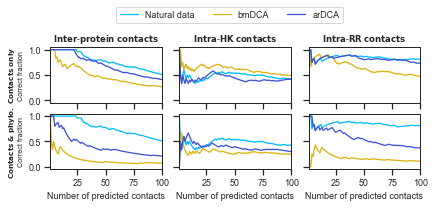

In [5]:
name_graph = "prot_HK_and_RR_Threshold_8_MinAllDist" #"prot_HK_and_RR_Threshold_4_MinAllDist"
plot_contact(name_graph, arDCA=True, bmDCA=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


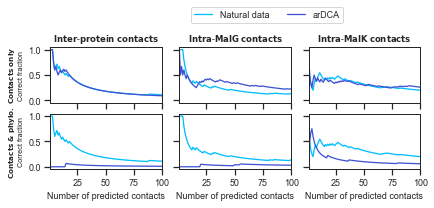

In [6]:
name_graph = "prot_MalG_MalK_Threshold_4_MinAllDist" #"prot_HK_and_RR_Threshold_4_MinAllDist"
plot_contact(name_graph, arDCA=True, bmDCA=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


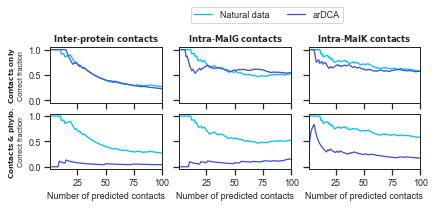

In [7]:
name_graph = "prot_MalG_MalK_Threshold_8_MinAllDist" #"prot_HK_and_RR_Threshold_4_MinAllDist"
plot_contact(name_graph, arDCA=True, bmDCA=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


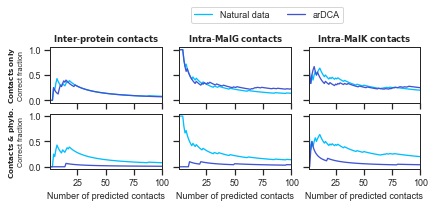

In [8]:
name_graph = "prot_MalG_MalK_Threshold_8_CarbonAlpha" #"prot_HK_and_RR_Threshold_4_MinAllDist"
plot_contact(name_graph, arDCA=True, bmDCA=False)